In [ ]:
!pip install -q kaggle
from google.colab import files
files.upload()
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia
!mkdir data
!unzip /content/chest-xray-pneumonia.zip -d data

Streaming output truncated to the last 5000 lines.
  inflating: data/chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0446-0001.j

In [ ]:
# Imports
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from PIL import Image
import pandas as pd
import tensorflow as tf
import glob as gb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping,ModelCheckpoint
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import cv2
import os
import random
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input

from tensorflow.keras.applications import MobileNet
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from IPython.display import display, Image as IPImage


import warnings
warnings.filterwarnings('ignore')

#First Technique **SVM and Logistic Regression**

In [ ]:
code = {'NORMAL':0 ,'PNEUMONIA':1}
#function to return the class of the images from its number, so the function would return 'Normal' if given 0, and 'PNEUMONIA' if given 1.
def getcode(n) :
    for x , y in code.items() :
        if n == y :
            return x

In [ ]:
trainpath = 'data/chest_xray/train/'


X_train = []
y_train = []
for folder in  os.listdir(trainpath) :
    files = gb.glob(pathname= str( trainpath + folder + '/*.jpeg'))
    for file in files:
        image = cv2.imread(file)
        image_array = cv2.resize(image , (64,64))
        X_train.append(list(image_array))
        y_train.append(code[folder])
np.save('X_train',X_train)
np.save('y_train',y_train)

In [ ]:
testpath='data/chest_xray/test/'

X_test = []
y_test = []
for folder in  os.listdir(testpath) :
    files = gb.glob(pathname= str( testpath + folder + '/*.jpeg'))
    for file in files:
        image = cv2.imread(file)
        image_array = cv2.resize(image , (64,64))
        X_test.append(list(image_array))
        y_test.append(code[folder])
np.save('X_test',X_test)
np.save('y_test',y_test)

In [ ]:
loaded_X_train = np.load('./X_train.npy')
loaded_X_test = np.load('./X_test.npy')
loaded_y_train = np.load('./y_train.npy')
loaded_y_test = np.load('./y_test.npy')

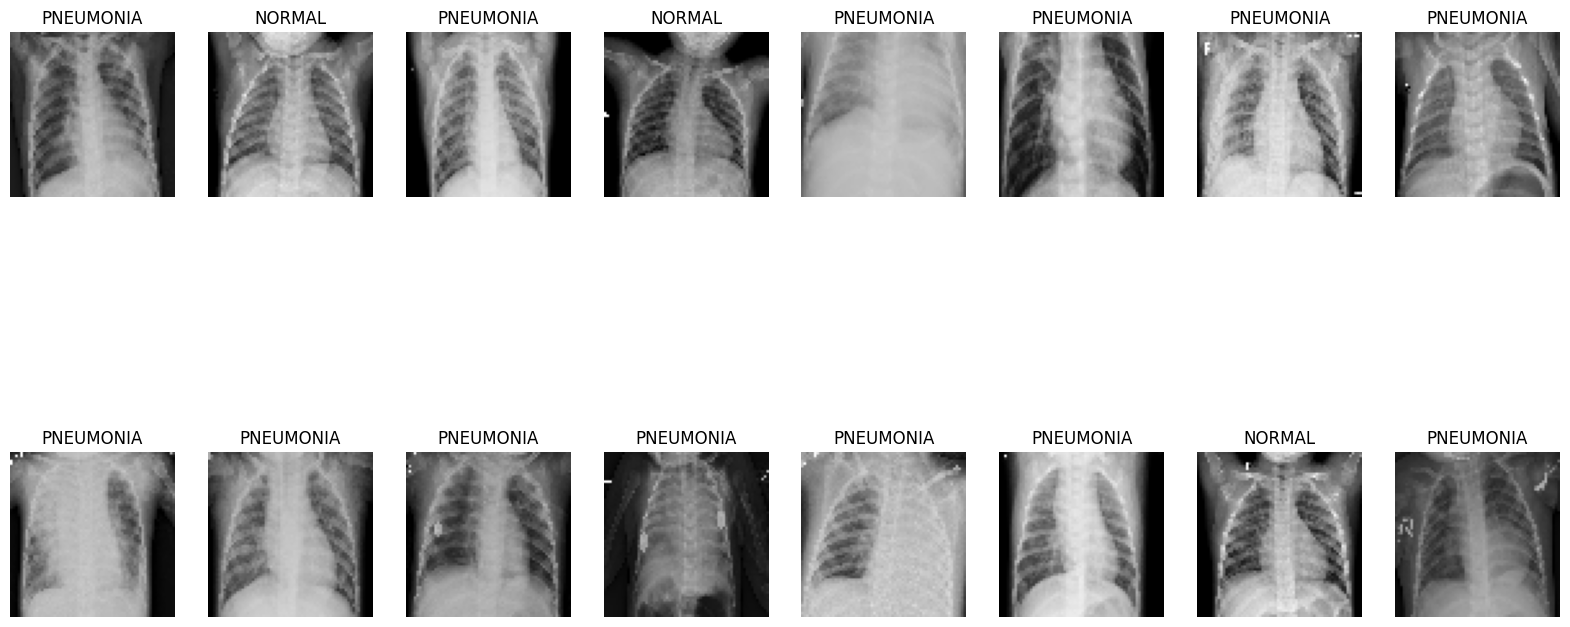

In [ ]:
plt.figure(figsize=(20,10))
for n , i in enumerate(np.random.randint(0,len(loaded_X_train),16)):
    plt.subplot(2,8,n+1)
    plt.imshow(loaded_X_train[i])
    plt.axis('off')
    plt.title(getcode(loaded_y_train[i]))

In [ ]:
X_train = loaded_X_train.reshape([-1, np.product((64,64,3))])
X_test = loaded_X_test.reshape([-1, np.product((64,64,3))])

In [ ]:
print(X_train.shape)
print(X_test.shape)

(5216, 12288)
(624, 12288)


In [ ]:
y_train = loaded_y_train
y_test = loaded_y_test

In [ ]:
pca = PCA(.95)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train, y_train)
with open('SVM_PCA.pkl', 'wb') as file:
    pickle.dump(svm_model, file)

In [ ]:
print('Support Vector Machine Classifier accuracy score is: ' + str(svm_model.score(X_test, y_test)))

Support Vector Machine Classifier accuracy score is: 0.7419871794871795


In [ ]:
svm_predcited = svm_model.predict(X_test)

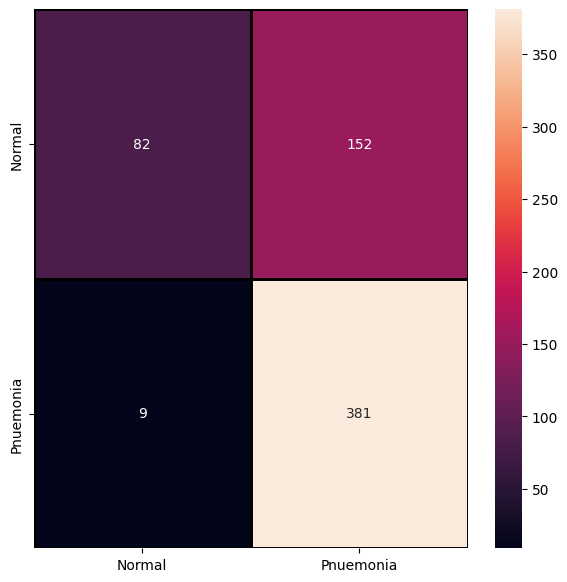

In [ ]:
labels = ['Normal', 'Pnuemonia']
cm = confusion_matrix(y_test,svm_predcited)
cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])
plt.figure(figsize = (7,7))
plt.title("")
sns.heatmap(cm, linecolor = 'black' , linewidth = 1 , annot = True, fmt='', xticklabels = labels, yticklabels = labels)
plt.show()

In [ ]:
log_reg  = LogisticRegression()

In [ ]:
log_reg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
print('Logistic Regression accuracy score is: ' + str(log_reg.score(X_test, y_test)))

Logistic Regression accuracy score is: 0.7852564102564102


In [ ]:
log_reg_predcited = log_reg.predict(X_test)

In [ ]:
def plot_cm(predictions, y_test, title):
  labels = ['Normal', 'Pnuemonia']
  cm = confusion_matrix(y_test,predictions)
  cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])
  plt.figure(figsize = (7,7))
  plt.title(title)
  sns.heatmap(cm, linecolor = 'black' , linewidth = 1 , annot = True, fmt='', xticklabels = labels, yticklabels = labels)
  plt.show()

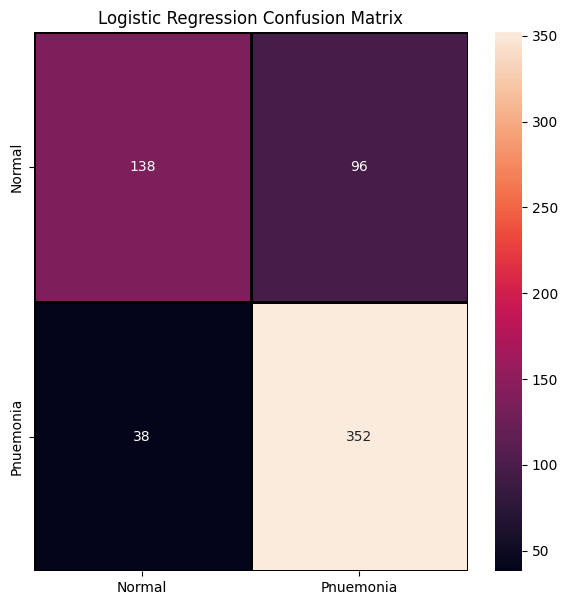

In [ ]:
plot_cm(log_reg_predcited, y_test, 'Logistic Regression Confusion Matrix')

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
log_reg_PCA  = LogisticRegression()

In [ ]:
log_reg_PCA.fit(X_train, y_train)
with open('LR_PCA.pkl', 'wb') as file:
    pickle.dump(log_reg_PCA, file)

In [ ]:
print('Logistic Regression accuracy score is: ' + str(log_reg_PCA.score(X_test, y_test)))

Logistic Regression accuracy score is: 0.7852564102564102


In [ ]:
log_reg_PCA_predcited = log_reg_PCA.predict(X_test)

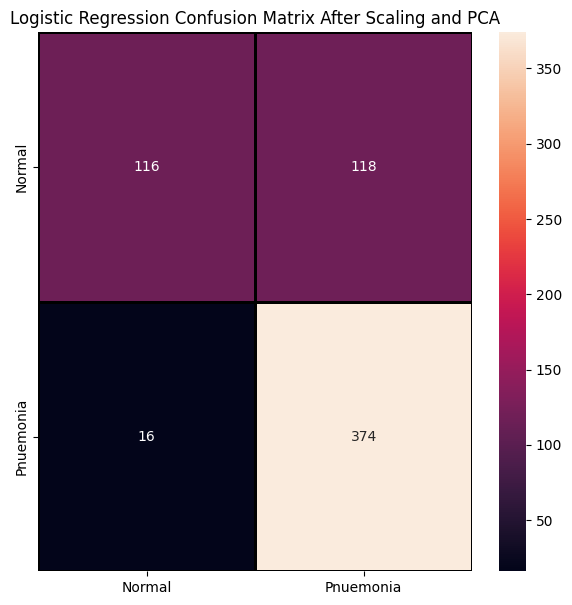

In [ ]:
plot_cm(log_reg_PCA_predcited, y_test, 'Logistic Regression Confusion Matrix After Scaling and PCA')

In [ ]:
print(classification_report(y_test, log_reg_predcited, target_names= ['Normal (0)', 'Pneumonia (1)']))

               precision    recall  f1-score   support

   Normal (0)       0.78      0.59      0.67       234
Pneumonia (1)       0.79      0.90      0.84       390

     accuracy                           0.79       624
    macro avg       0.78      0.75      0.76       624
 weighted avg       0.79      0.79      0.78       624



#Second Technique **CNN**

In [ ]:
train = '/content/data/chest_xray/train/'
test = '/content/data/chest_xray/test/'
val = '/content/data/chest_xray/val/'

## Showing Normal Person

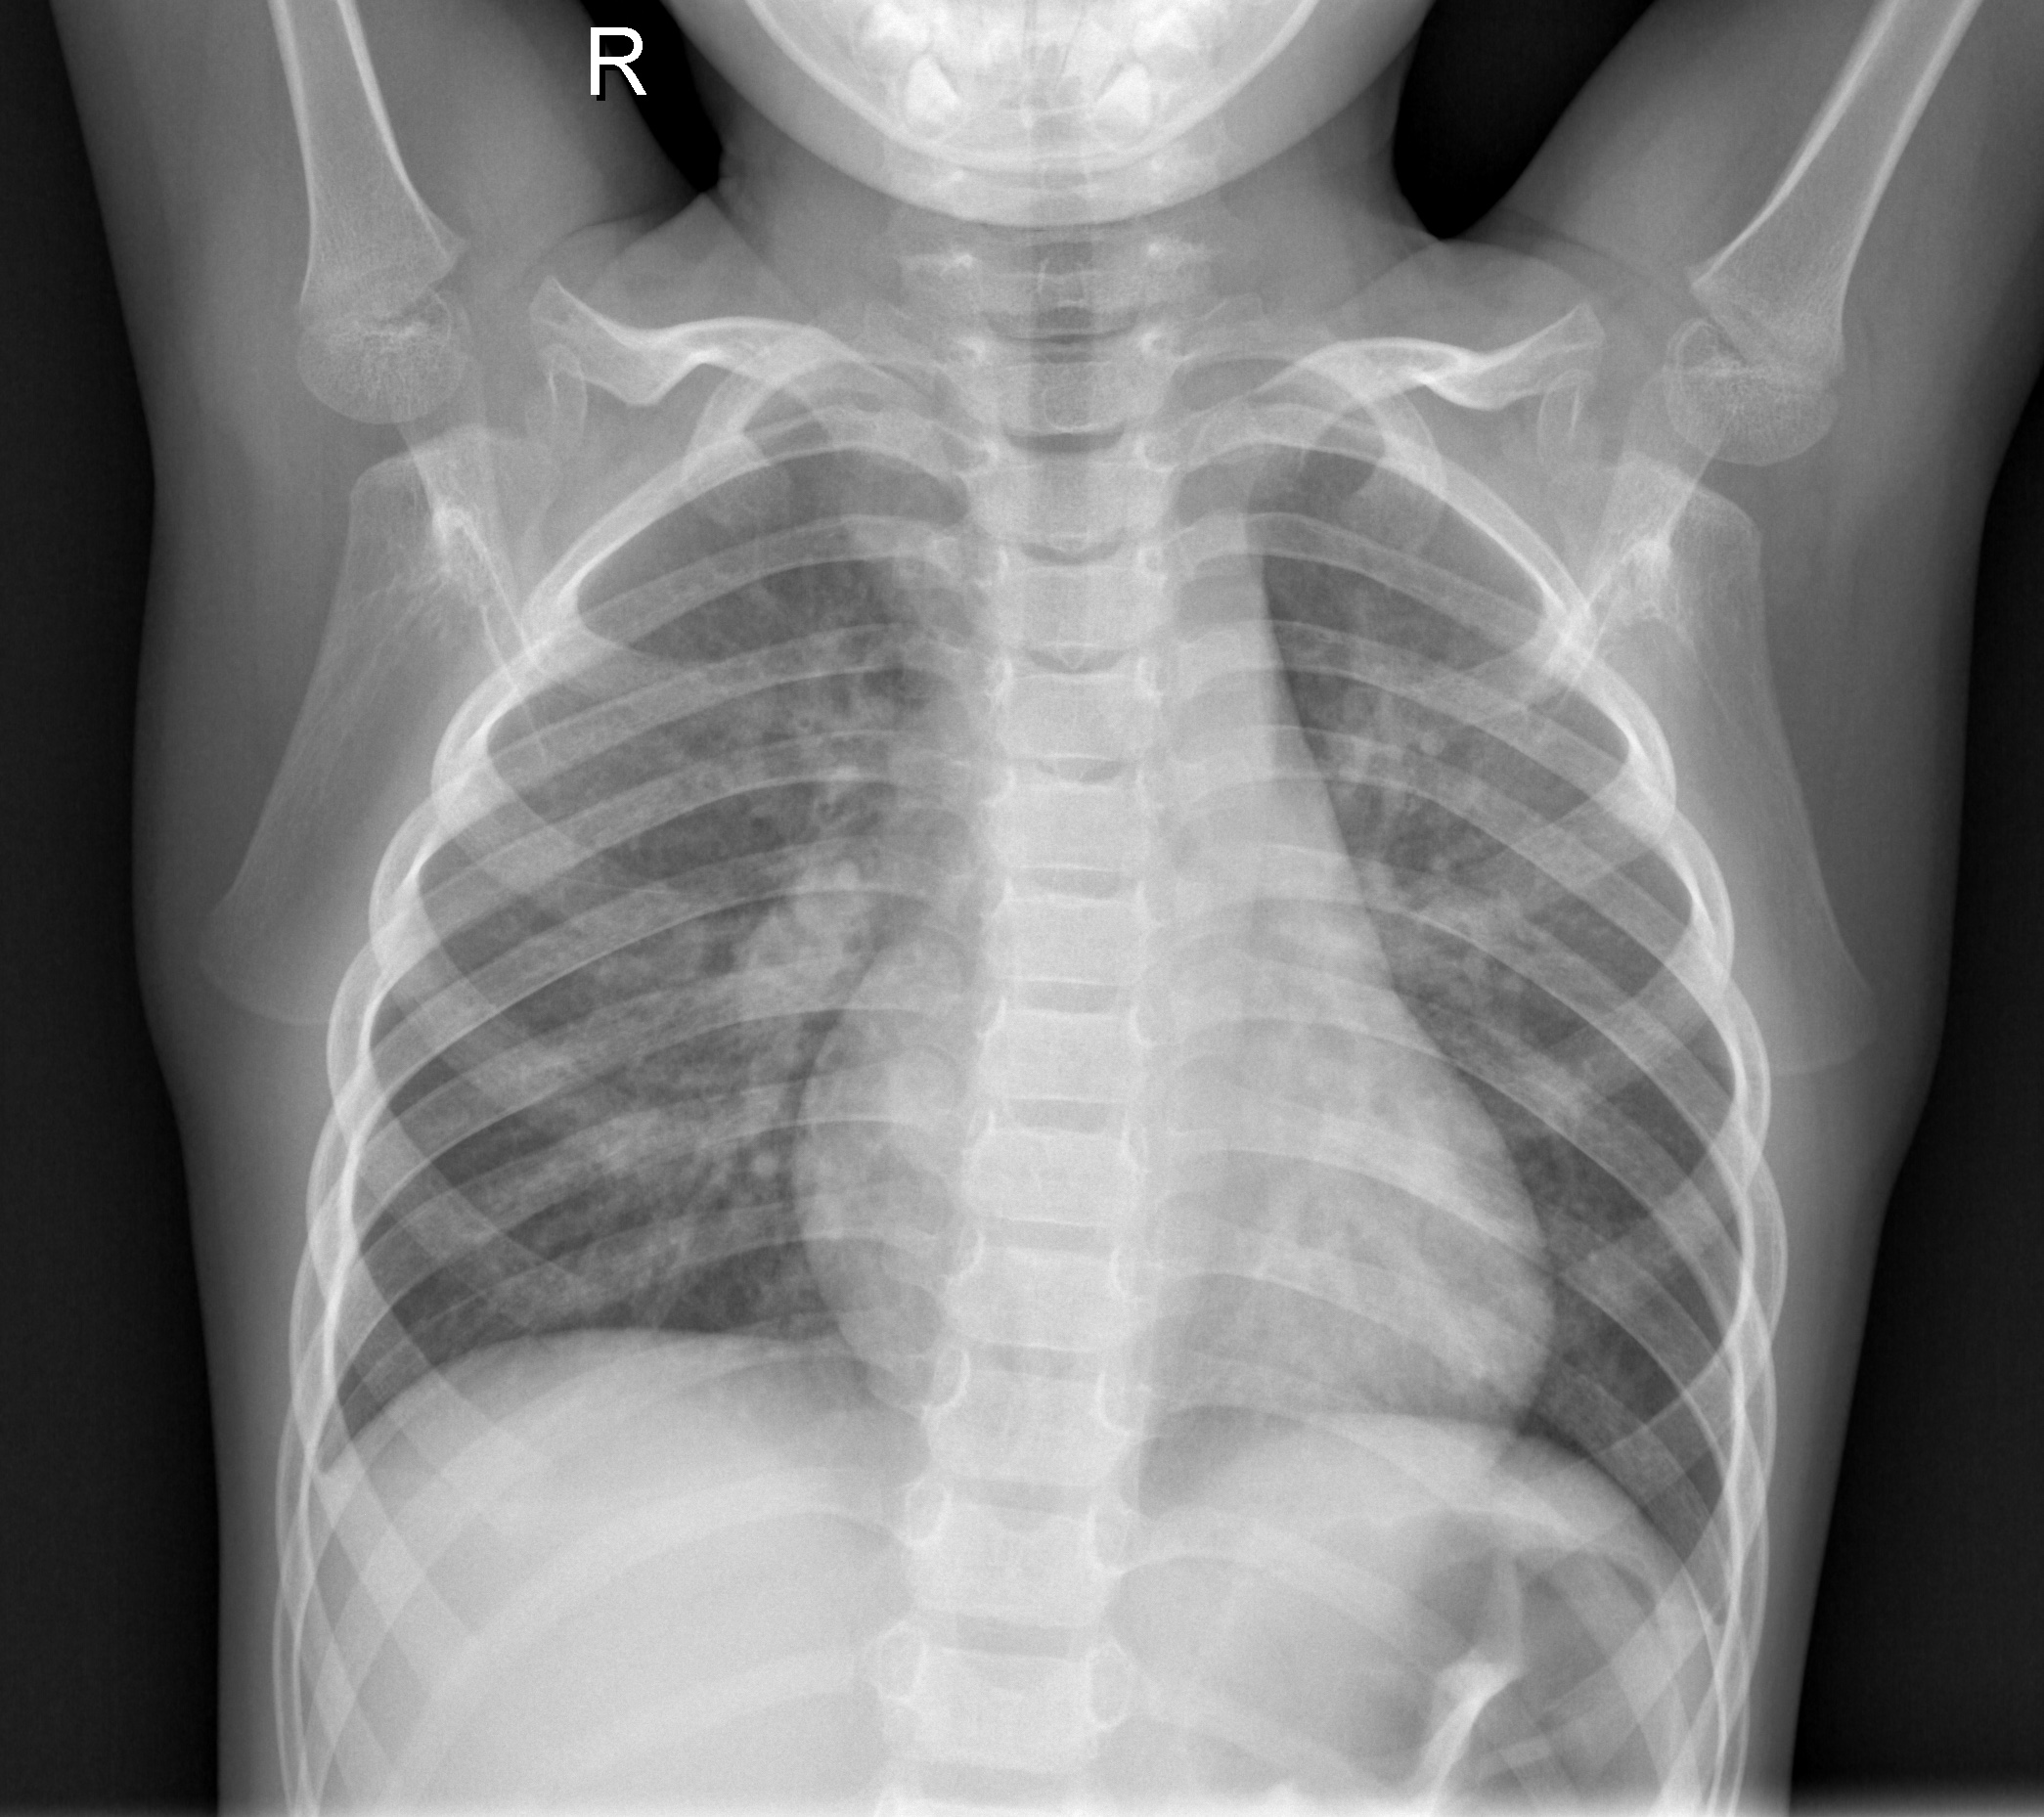

In [ ]:
Image.open(train+"/NORMAL/IM-0115-0001.jpeg")

## Showing Person has Pneumonia

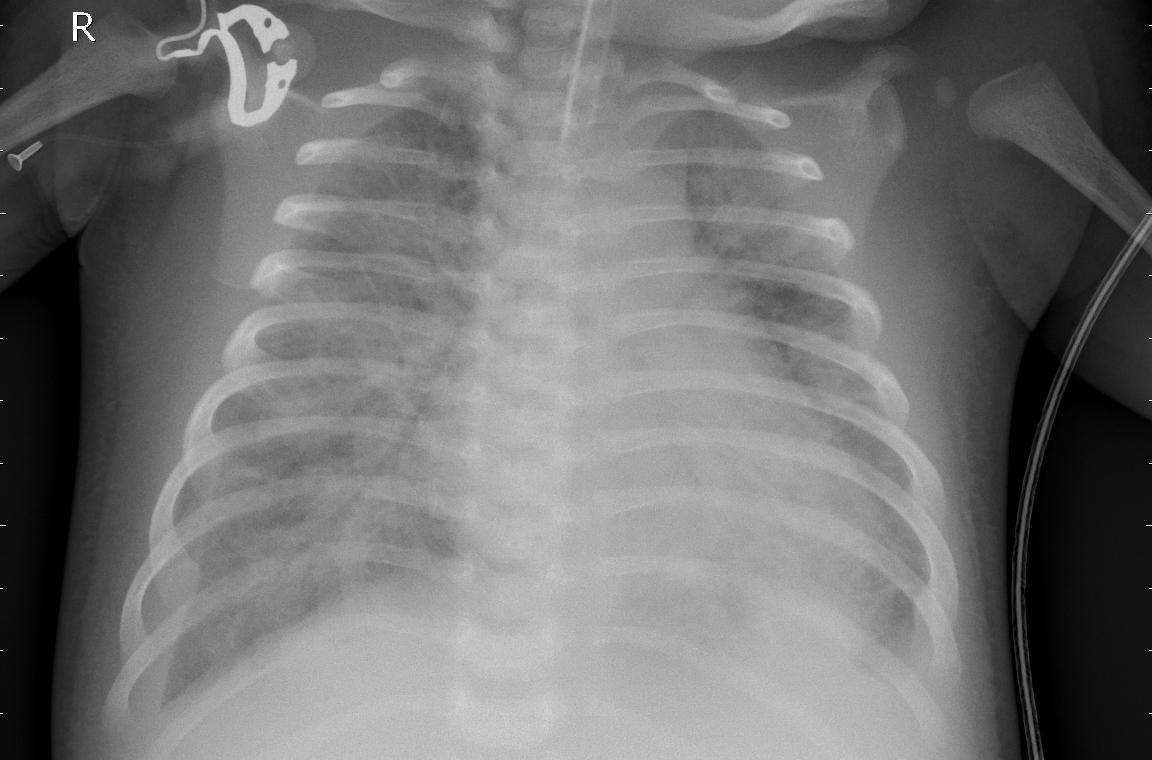

In [ ]:
Image.open(train+"/PNEUMONIA/person1000_bacteria_2931.jpeg")

In [ ]:
training_generator=ImageDataGenerator(
        rescale=1/255,featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = False,  # randomly flip images
        vertical_flip=False)
validation_generator=ImageDataGenerator(rescale=1/255)
test_generator=ImageDataGenerator(rescale=1/255)
train_generator=training_generator.flow_from_directory(train,target_size=(200,200),batch_size=4,class_mode='binary')
val_generator=validation_generator.flow_from_directory(val,target_size=(200,200),batch_size=4,class_mode='binary')
test_generator=test_generator.flow_from_directory(test,target_size=(200,200),batch_size=16,class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
CNN_Model=tf.keras.Sequential([
    # First Layer with Batching on 3x3 with input shape color = 3
    tf.keras.layers.Conv2D(32,(3,3),input_shape=(200,200,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Second Layer
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    # Third Layer
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    # Fourth Layer
    tf.keras.layers.Conv2D(256,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Final Layer
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [ ]:
CNN_Model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])
history = CNN_Model.fit_generator(train_generator,validation_data = val_generator,epochs = 15,verbose = 1)

Epoch 1/15
1304/1304 [==============================] - 107s 77ms/step - loss: 0.4612 - accuracy: 0.7811 - val_loss: 0.8137 - val_accuracy: 0.6250
Epoch 2/15
1304/1304 [==============================] - 98s 75ms/step - loss: 0.3081 - accuracy: 0.8691 - val_loss: 0.7379 - val_accuracy: 0.6875
Epoch 3/15
1304/1304 [==============================] - 100s 77ms/step - loss: 0.2801 - accuracy: 0.8794 - val_loss: 0.5852 - val_accuracy: 0.8125
Epoch 4/15
1304/1304 [==============================] - 99s 76ms/step - loss: 0.2661 - accuracy: 0.8794 - val_loss: 0.5906 - val_accuracy: 0.6875
Epoch 5/15
1304/1304 [==============================] - 97s 75ms/step - loss: 0.2522 - accuracy: 0.8921 - val_loss: 0.5024 - val_accuracy: 0.8125
Epoch 6/15
1304/1304 [==============================] - 99s 76ms/step - loss: 0.2354 - accuracy: 0.8955 - val_loss: 0.6045 - val_accuracy: 0.7500
Epoch 7/15
1304/1304 [==============================] - 100s 77ms/step - loss: 0.2318 - accuracy: 0.9039 - val_loss: 1.094

In [ ]:
# Calculating Accuracy on Test
print("Loss of the model is - " , CNN_Model.evaluate(test_generator)[0]*100 , "%")
print("Accuracy of the model is - " , CNN_Model.evaluate(test_generator)[1]*100 , "%")

39/39 [==============================] - 8s 174ms/step - loss: 0.2973 - accuracy: 0.9022
Loss of the model is -  29.732787609100342 %
39/39 [==============================] - 5s 112ms/step - loss: 0.2973 - accuracy: 0.9022
Accuracy of the model is -  90.22436141967773 %


<Figure size 640x480 with 0 Axes>

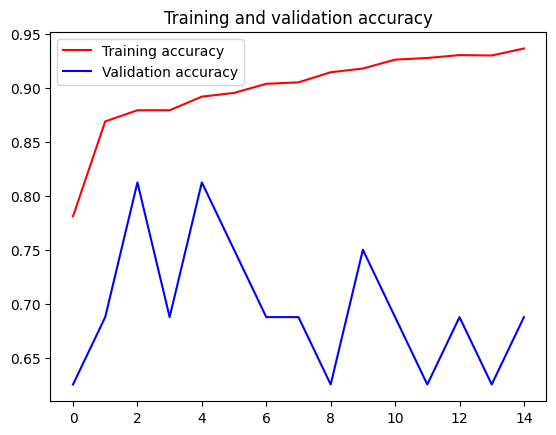

<Figure size 640x480 with 0 Axes>

In [ ]:
# prompt: plot history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

In [ ]:
CNN_Model.save('CNN.h5')
CNN = tf.keras.models.load_model('CNN.h5')

In [ ]:
# Get a random image from the training set
img_path = random.choice(test_generator.filepaths)
# Read the image using OpenCV
img = cv2.imread(img_path)
img = cv2.resize(img, (200, 200))
# Convert the image to an array
img_array = img_to_array(img)
# Reshape the array to match the model's input shape
img_array = img_array.reshape(-1, 200, 200, 3)
# Normalize the pixel values if needed (depends on the preprocessing done during training)
img_array = img_array / 255.0  # Uncomment and modify if necessary
# Make predictions using the model
pred = CNN.predict(img_array)
# Print the predictions
if(pred >= 0.5):
  print(img_path,'Pneumonia Achieved',sep='\n')
else: print(img_path,"Normal Achieved",sep='\n')

1/1 [==============================] - 0s 409ms/step
/content/data/chest_xray/test/PNEUMONIA/person78_bacteria_386.jpeg
Pneumonia Achieved


# Pre-Trained Modeling

In [ ]:
# Set the path to the dataset
base_dir = '/content/data/chest_xray'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')


In [ ]:
# Use VGG16 as a pre-trained model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224,224, 3))

# Freeze the convolutional layers
for layer in base_model.layers:
    layer.trainable = False

# Build the custom model on top of VGG16
x = layers.Flatten()(base_model.output)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(1, activation='sigmoid')(x)

VGG_Model = Model(base_model.input, x)

# Compile the model
VGG_Model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Data augmentation to prevent overfitting
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,target_size=(224, 224),batch_size=32,class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(224, 224),batch_size=32,class_mode='binary')

# Train the model
history = VGG_Model.fit(train_generator,steps_per_epoch=len(train_generator),epochs=10,validation_data=validation_generator,validation_steps=len(validation_generator))

58889256/58889256 [==============================] - 0s 0us/step


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Epoch 1/10
163/163 [==============================] - 116s 661ms/step - loss: 0.3174 - accuracy: 0.9097 - val_loss: 0.4517 - val_accuracy: 0.7500
Epoch 2/10
163/163 [==============================] - 102s 623ms/step - loss: 0.1400 - accuracy: 0.9482 - val_loss: 0.3121 - val_accuracy: 0.8125
Epoch 3/10
163/163 [==============================] - 101s 618ms/step - loss: 0.1405 - accuracy: 0.9444 - val_loss: 0.4685 - val_accuracy: 0.7500
Epoch 4/10
163/163 [==============================] - 100s 615ms/step - loss: 0.1279 - accuracy: 0.9521 - val_loss: 0.3234 - val_accuracy: 0.7500
Epoch 5/10
163/163 [==============================] - 103s 630ms/step - loss: 0.1182 - accuracy: 0.9569 - val_loss: 0.6984 - val_accuracy: 0.6875
Epoch 6/10
163/163 [==============================] - 102s 628ms/step - loss: 0.1069 - accuracy: 0.9590 - val_loss: 0.2925 - val_accuracy: 0.8125
Epoch 7/10
163/163 [======================

Found 624 images belonging to 2 classes.
20/20 [==============================] - 5s 252ms/step - loss: 0.2393 - accuracy: 0.9183
Test Accuracy: 91.83%


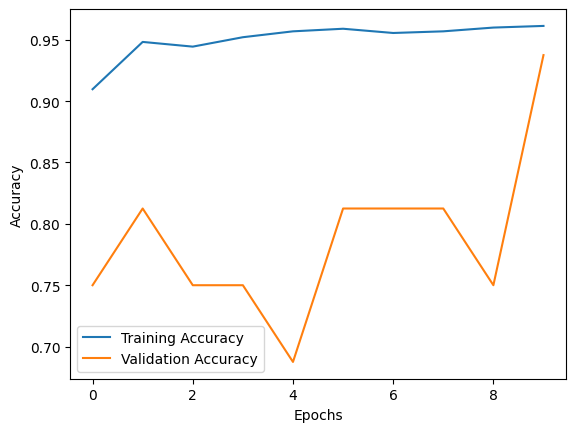

In [ ]:
# Evaluate the model on the test set
test_generator = test_datagen.flow_from_directory(test_dir,target_size=(224, 224),batch_size=32,class_mode='binary')

eval_result = VGG_Model.evaluate(test_generator)
print(f"Test Accuracy: {eval_result[1]*100:.2f}%")

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
VGG_Model.save('VGG.h5')
VGG = tf.keras.models.load_model('VGG.h5')

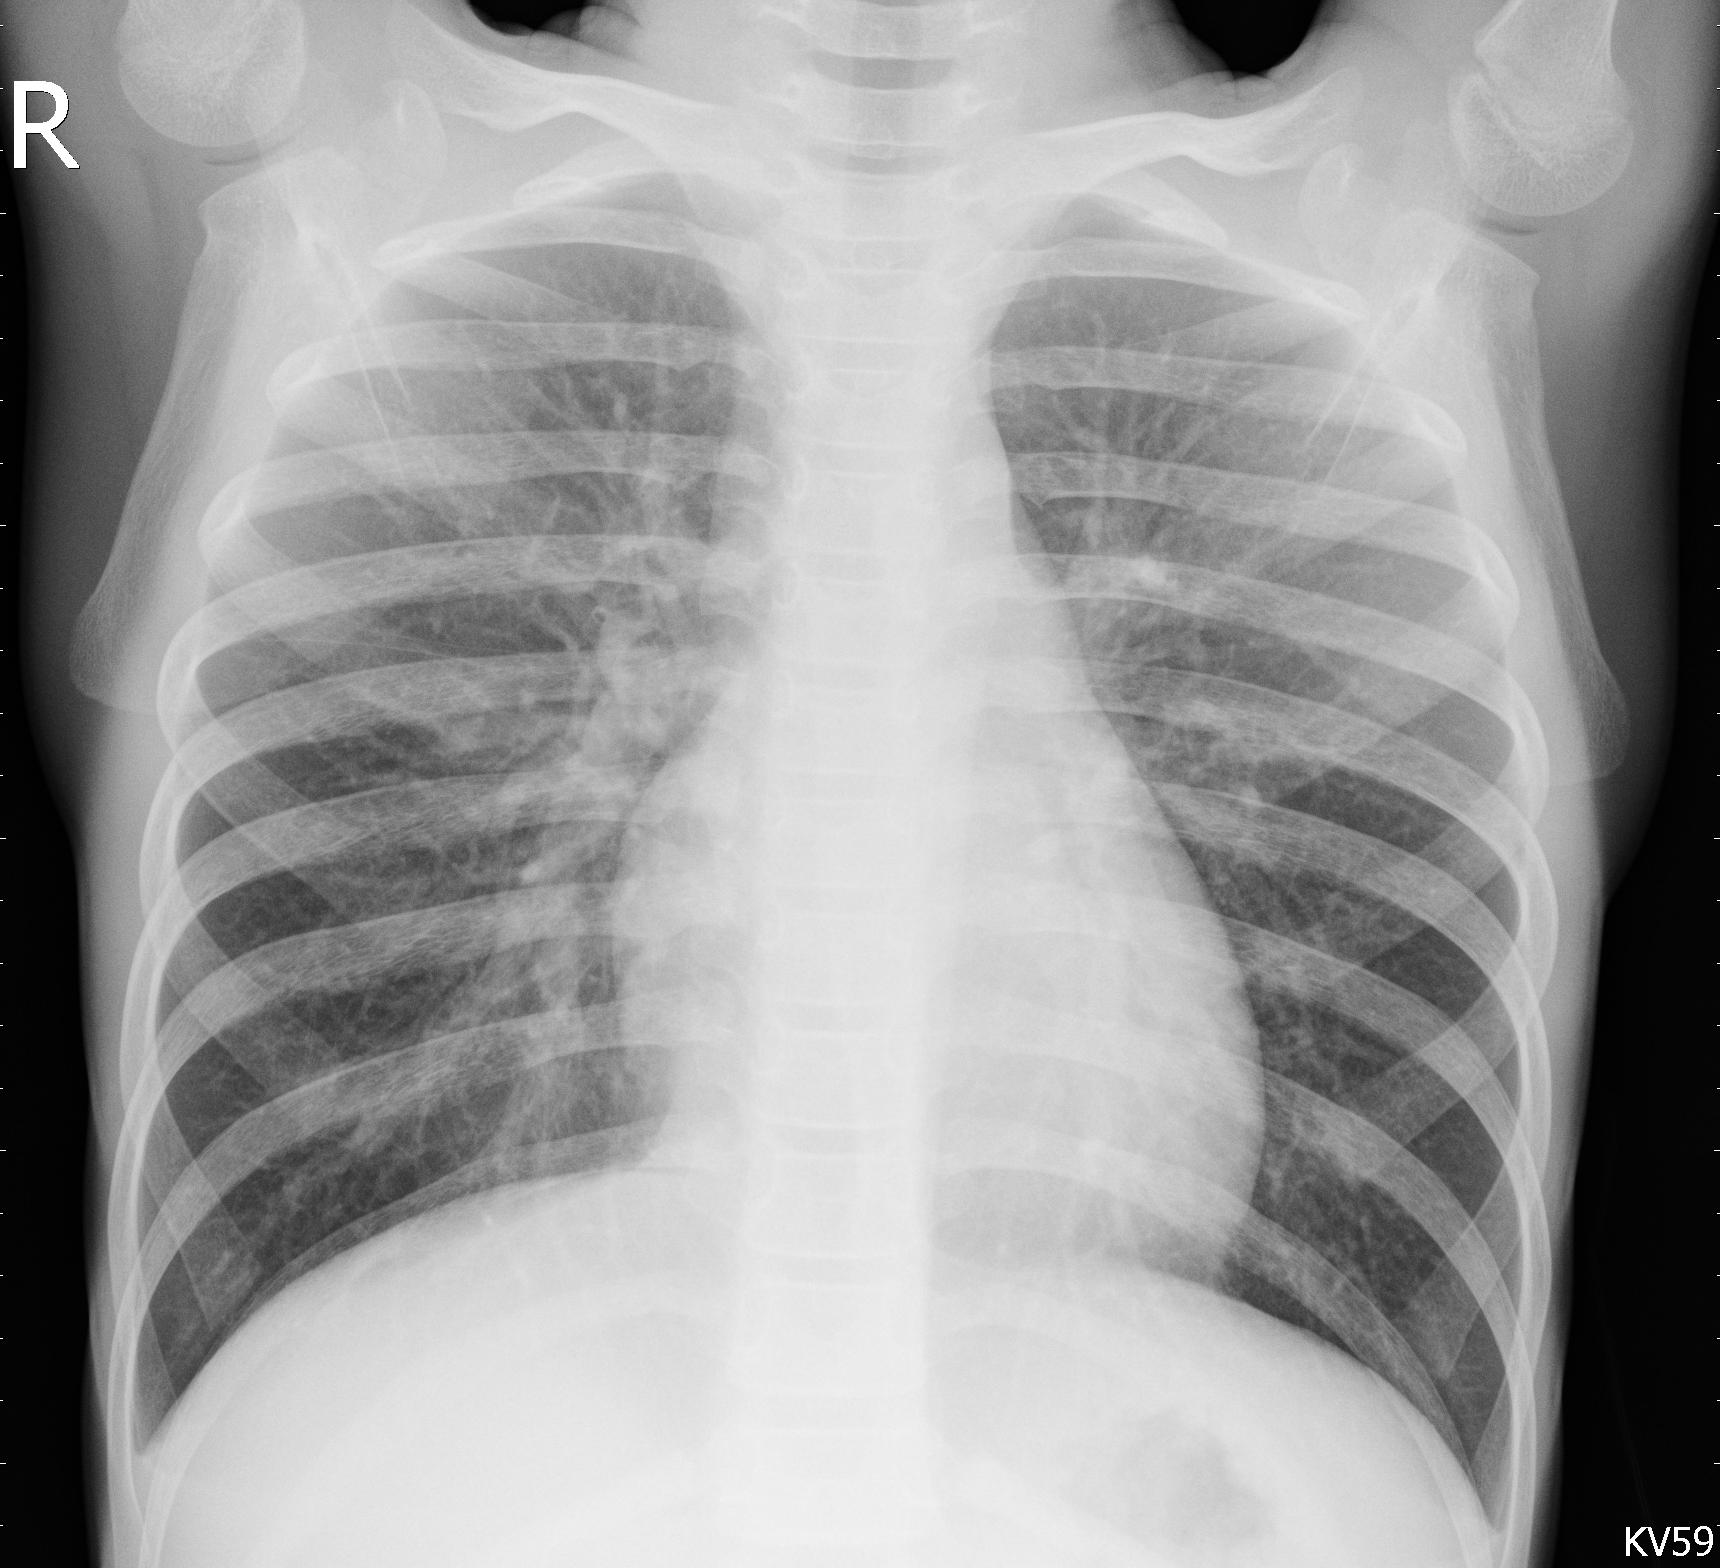

Photo Name: NORMAL2-IM-0196-0001.jpeg
1/1 [==============================] - 1s 1s/step
Prediction: Normal (Confidence: 0.9909)


In [ ]:
# Set the path to the test set
train_dir = '/content/data/chest_xray/test'

# Get a list of files in the training set
normal_dir = os.path.join(train_dir, 'NORMAL')
file_list = os.listdir(normal_dir)

# Choose a random file
random_file = np.random.choice(file_list)
file_path = os.path.join(normal_dir, random_file)

# Load the image
img = load_img(file_path, target_size=(224, 224))
img_array = img_to_array(img)
img_array = preprocess_input(img_array.reshape(1, 224, 224, 3))

# Display the image using IPython.display
display(IPImage(filename=file_path))

# Print the photo name
print(f"Photo Name: {random_file}")

# Use your model to predict
prediction = VGG.predict(img_array)

# Display the prediction
class_label = 'Pneumonia' if prediction < 0.5 else 'Normal'
print(f"Prediction: {class_label} (Confidence: {prediction[0][0]:.4f})")


MobileNet

17225924/17225924 [==============================] - 0s 0us/step


Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Epoch 1/8
20/20 [==============================] - 15s 578ms/step - loss: 0.5801 - accuracy: 0.7628 - val_loss: 0.5897 - val_accuracy: 0.6875
Epoch 2/8
20/20 [==============================] - 11s 544ms/step - loss: 0.3185 - accuracy: 0.8814 - val_loss: 0.3853 - val_accuracy: 0.6875
Epoch 3/8
20/20 [==============================] - 12s 580ms/step - loss: 0.2480 - accuracy: 0.8926 - val_loss: 0.4708 - val_accuracy: 0.7500
Epoch 4/8
20/20 [==============================] - 11s 569ms/step - loss: 0.2240 - accuracy: 0.9038 - val_loss: 0.4051 - val_accuracy: 0.8125
Epoch 5/8
20/20 [==============================] - 12s 578ms/step - loss: 0.2143 - accuracy: 0.9167 - val_loss: 0.4085 - val_accuracy: 0.8125
Epoch 6/8
20/20 [==============================] - 11s 560ms/step - loss: 0.2079 - accuracy: 0.9247 - val_loss: 0.5740 - val_accuracy: 0.7500
Epoch 7/8
20/20 [==============================] - 10s 505ms/step -

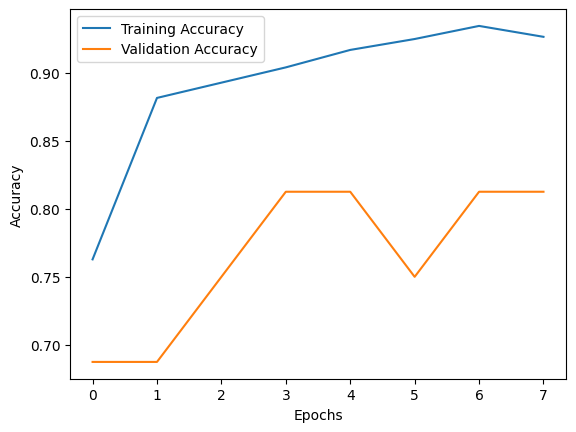

In [ ]:
# Use MobileNet as a pre-trained model
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the convolutional layers
for layer in base_model.layers:
    layer.trainable = False

# Build the custom model on top of MobileNet
x = layers.GlobalAveragePooling2D()(base_model.output)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
output = layers.Dense(1, activation='sigmoid')(x)

Mobile_Model = Model(base_model.input, output)

# Compile the model
Mobile_Model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Data augmentation to prevent overfitting
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(224, 224), batch_size=32, class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(224, 224), batch_size=32, class_mode='binary')

# Train the model
history = Mobile_Model.fit(train_generator, steps_per_epoch=len(train_generator), epochs=8,
                    validation_data=validation_generator, validation_steps=len(validation_generator))

# Evaluate the model on the test set
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(224, 224), batch_size=32, class_mode='binary')
eval_result = Mobile_Model.evaluate(test_generator)
print(f"Test Accuracy: {eval_result[1]*100:.2f}%")

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
Mobile_Model.save('Mobile.h5')
Mobile = tf.keras.models.load_model('Mobile.h5')

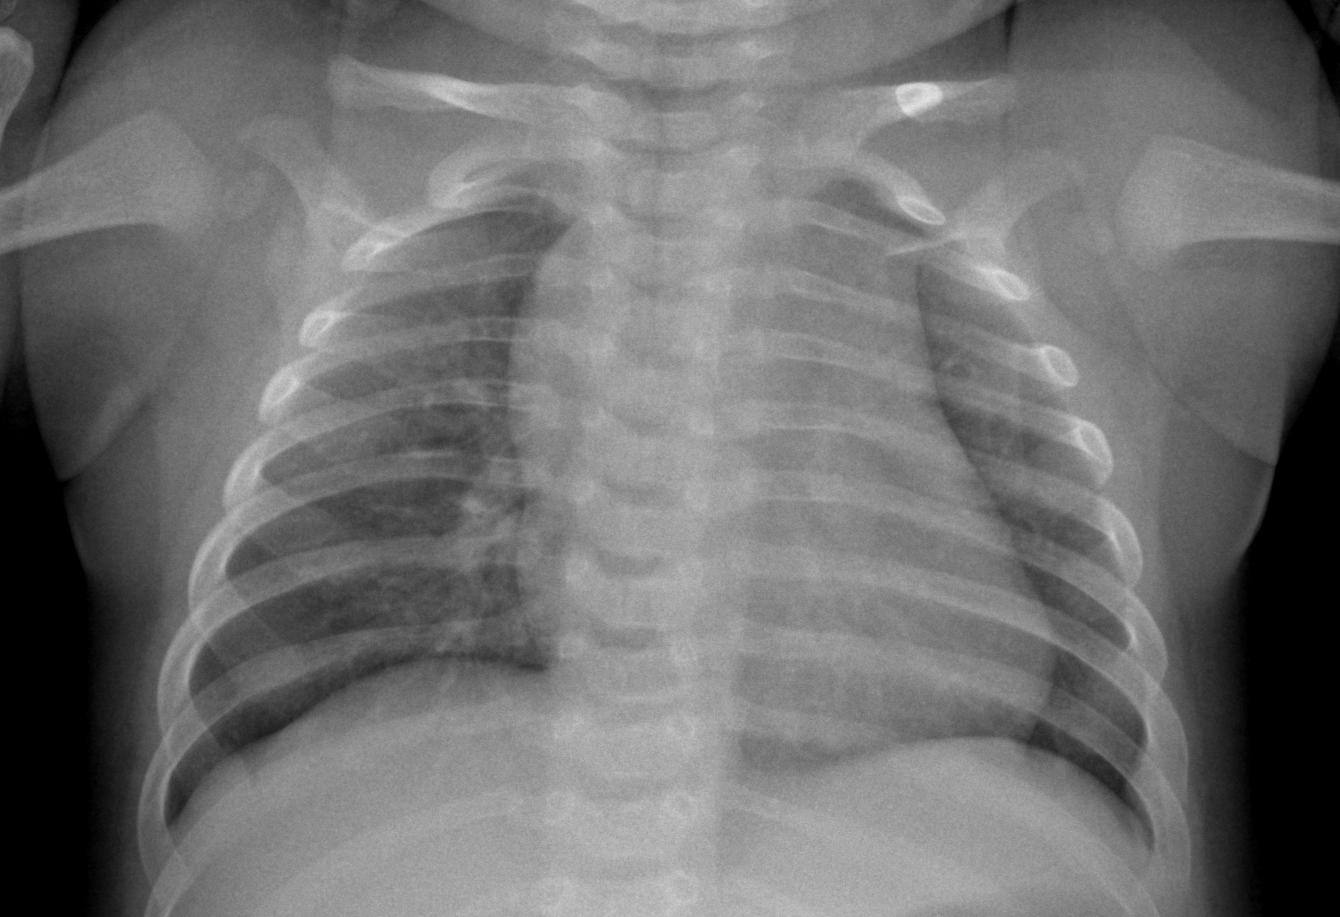

Photo Name: NORMAL2-IM-0272-0001.jpeg
1/1 [==============================] - 0s 29ms/step
Prediction: Normal (Confidence: 0.8816)


In [ ]:
# Set the path to the test set
train_dir = '/content/data/chest_xray/test'

# Get a list of files in the training set
normal_dir = os.path.join(train_dir, 'NORMAL')
file_list = os.listdir(normal_dir)

# Choose a random file
random_file = np.random.choice(file_list)
file_path = os.path.join(normal_dir, random_file)

# Load the image
img = load_img(file_path, target_size=(224, 224))
img_array = img_to_array(img)
img_array = preprocess_input(img_array.reshape(1, 224, 224, 3))

# Display the image using IPython.display
display(IPImage(filename=file_path))

# Print the photo name
print(f"Photo Name: {random_file}")

# Use your model to predict
prediction = Mobile.predict(img_array)

# Display the prediction
class_label = 'Pneumonia' if prediction < 0.5 else 'Normal'
print(f"Prediction: {class_label} (Confidence: {prediction[0][0]:.4f})")
